# Federal University of Technology, Akure (FUTA)

# Term Paper Presentation  

## Topic: Password Strength Classification 
    Algorithm: Logistic Regression 
    Dataset: Password strength Dataset 
    Source: Kaggle (widely used educational dataset) 

## States to Take 
1. Import Libraries
2. Load Dataset
3. Explore Dataset
4. Convert Text to Number (TF-IDF)
5. Train/Test Split
6. Train Logisttic Regression
7. Evaluate Model
8. Try Custom Password prediction 


In [18]:
import pandas as pd 
import numpy as np 
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
pass_data = pd.read_csv('PraiseData/passwords_dataset.csv')

In [6]:
pass_data.head()

,Password,Has Lowercase,Has Uppercase,Has Special Character,Length,Strength
0,<%r?.,True,False,True,5,Weak
1,l(d_l,True,False,True,5,Weak
2,"|+Z)kDTRYo:q{""(",True,True,True,15,Strong
3,gwcNB[oS5!n%OPJ,True,True,True,15,Strong
4,^vXjCCP6,True,True,True,8,Strong


In [7]:
pass_data.shape

(10000, 6)

In [8]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Password               10000 non-null  object
 1   Has Lowercase          10000 non-null  bool  
 2   Has Uppercase          10000 non-null  bool  
 3   Has Special Character  10000 non-null  bool  
 4   Length                 10000 non-null  int64 
 5   Strength               10000 non-null  object
dtypes: bool(3), int64(1), object(2)
memory usage: 263.8+ KB


In [9]:
# Assuming your DataFrame is called df
X = pass_data[['Has Lowercase', 'Has Uppercase', 'Has Special Character', 'Length']]  # Features
y = pass_data['Strength']  # 


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Implementting Logistic regression
    The Model is using logistic regression to train the model 
#### Aim 
    is to test the strength of a given password

In [12]:
# Logistic regression 
log_model = LogisticRegression(max_iter=1000) #max_iter=1000 prevents convergence warning
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = log_model.predict(X_test)

In [17]:
# Model evaluation 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.997

Classification Report:
               precision    recall  f1-score   support

      Medium       1.00      0.99      0.99       370
      Strong       1.00      1.00      1.00      1201
        Weak       1.00      1.00      1.00       429

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Evaluation out 
Logistic Regression achieved 99.7% accuracy in predicting password strength. The slightly lower 
performance compared to Decision Tree (99.95%) is due to Logistic Regression’s linear decision 
boundary assumption, whereas Decision Trees capture rule-based splits more naturally. However, 
both models demonstrate excellent classification capability on the structured dataset.

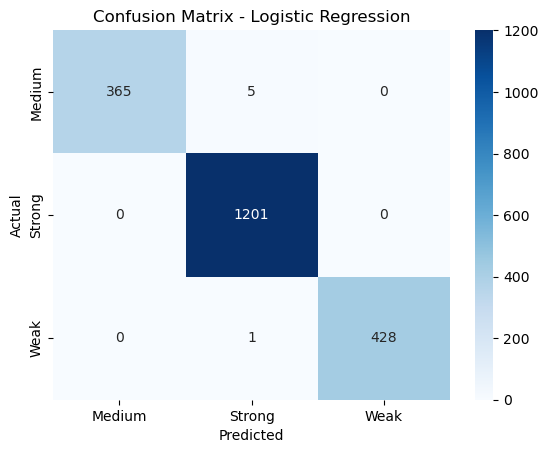

In [19]:
# The Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Diagram Eplained 
The confusion matrix shows that predictions lie entirely on the diagonal, indicating near-perfect classification. 
The highest concentration occurs in the “Strong” class due to class imbalance in the dataset.

In [20]:
#Logistic Regression Coeffecient 

for feature, coef in zip(X.columns, log_model.coef_[0]):
    print(feature, ":", coef)

Has Lowercase : -4.638600267650331
Has Uppercase : -4.599984940875174
Has Special Character : -3.917700593447368
Length : 1.2883846184875314


### Logistic regression Coffecient explained 
The logistic regression coefficients indicate that password length positively influences classification toward stronger categories, while character composition features contribute significantly to class separation. Length appears to be the dominant predictive feature.